# **Trabalho Inteligência de Negócios - 2024/01**

## 1. Informações Gerais
**Título:** Manutenção Preditiva NASA

**Integrantes:**
  - Pedro H. P. Fontana
  - José Guilherme
  - Lucas Fidalgo

**Data:** 28/05/2024

**Disciplinas:** Inteligência de Negócios - 2024/01

https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/data 


## 01. Loading Data

In [36]:
import pandas as pd

index_names = ['id', 'time']
setting_names = ['op_setting_1', 'op_setting_2', 'op_setting_3']
sensor_names = ['sensor_' + str(i) for i in range(1, 21)]

column_names = index_names + setting_names + sensor_names

# Load data
train_df = pd.read_csv(
    '../data/raw/train_FD001.txt',
      sep='\s+', 
      header=None, 
      index_col=False, 
      names=column_names,
      )

test_df = pd.read_csv('../data/raw/test_FD001.txt',
        sep='\s+', 
        header=None, 
        index_col=False, 
        names=column_names,
        )

rul_df = pd.read_csv('../data/raw/RUL_FD001.txt',
        sep='\s+', 
        header=None, 
        index_col=False, 
        names=['RUL'],
        )

/var/folders/49/pdpmsz1x33g_s0glp3s0b0wh0000gn/T/ipykernel_1487/3564453458.py:10: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_df = pd.read_csv(
/var/folders/49/pdpmsz1x33g_s0glp3s0b0wh0000gn/T/ipykernel_1487/3564453458.py:18: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test_df = pd.read_csv('../data/raw/test_FD001.txt',


In [37]:
train_df.head()

,id,time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20631 non-null  int64  
 1   time          20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14     20631 non-nu

* The dataset sequences take from 100 different turbines

## 02. Data Processing and EDA

In [5]:
# transform id to categorical
train_df['id'] = train_df['id'].astype('category')

In [38]:
print(f"Shape of train_df: {train_df.shape}")
print(f"Shape of test_df: {test_df.shape}")

Shape of train_df: (20631, 25)
Shape of test_df: (13096, 25)


In [40]:
train_df[["id", "time"]].describe(include="all")

,id,time
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [57]:
ids_ = train_df["id"].unique()[:10]


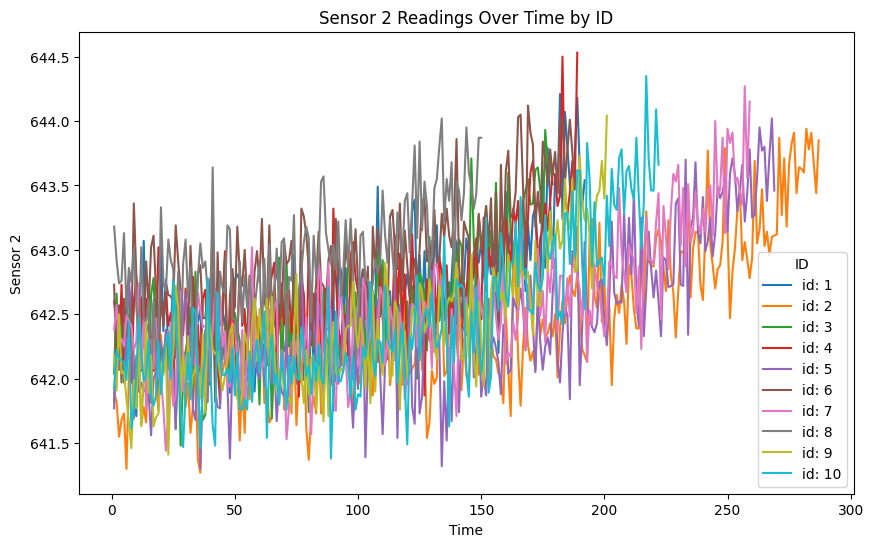

In [65]:
import matplotlib.pyplot as plt
# Filter the dataframe
filtered_df = train_df[train_df['id'].isin(ids_)]

# Create the plot
plt.figure(figsize=(10, 6))

for unique_id in filtered_df['id'].unique():
    subset = filtered_df[filtered_df['id'] == unique_id]
    plt.plot(subset['time'], subset['sensor_2'], label=f'id: {unique_id}')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Sensor 2')
plt.title('Sensor 2 Readings Over Time by ID')
plt.legend(title='ID')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def helper_plot_ensemble(data, unit_numbers, nsample=10):
    if unit_numbers is None:
        unit_numbers = data['id'].unique()[:nsample]
        
    plt.figure(figsize=(12, 6))
    for unit in unit_numbers:
        unit_data = data[data['id'] == unit]
        plt.plot(unit_data['time'], unit_data['fused_health_indicator'], label=f'Unit {unit}')
    
    plt.xlabel('Time')
    plt.ylabel('Health Indicator')
    plt.title('Training Data')
    plt.legend()
    plt.show()

# Visualize
helper_plot_ensemble(train_data_normalized, None, 20)

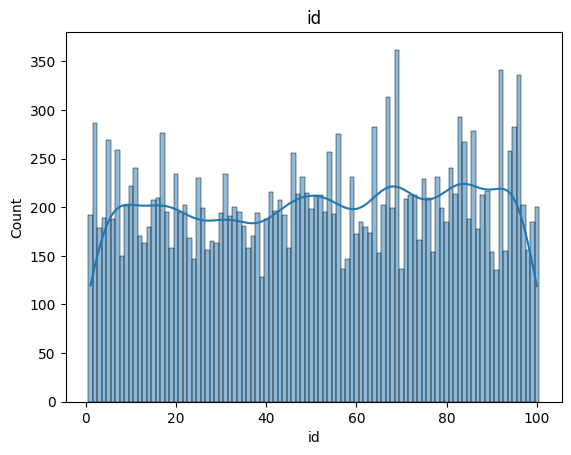

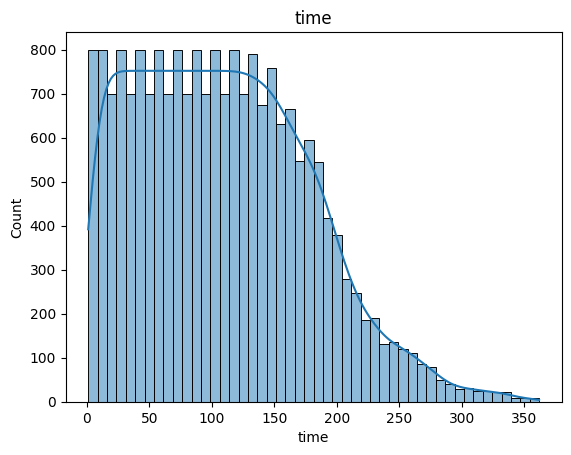

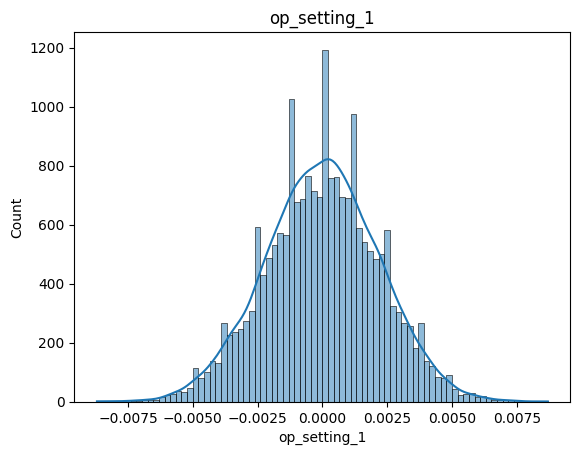

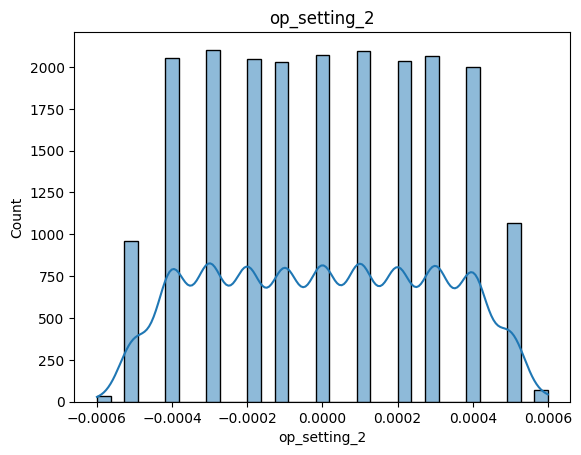

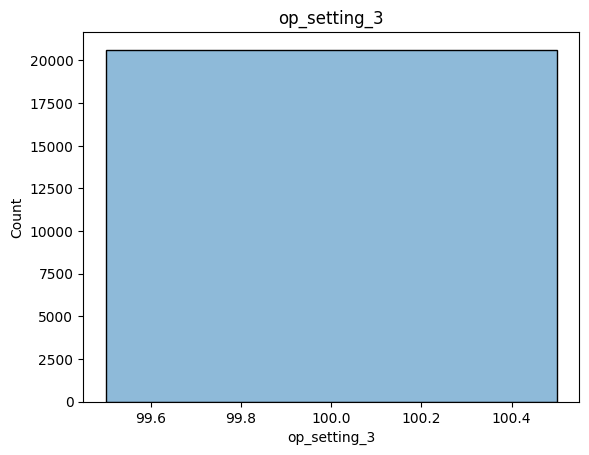

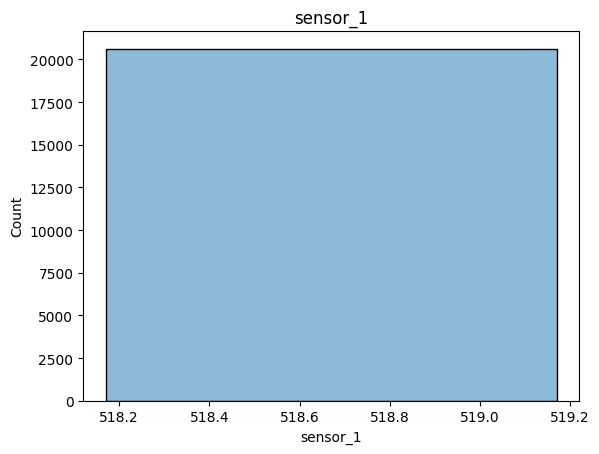

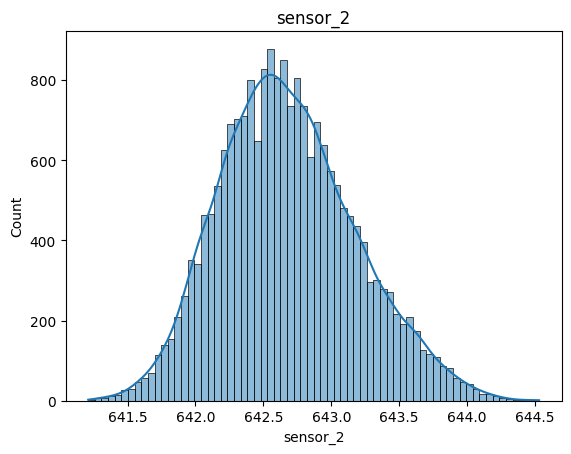

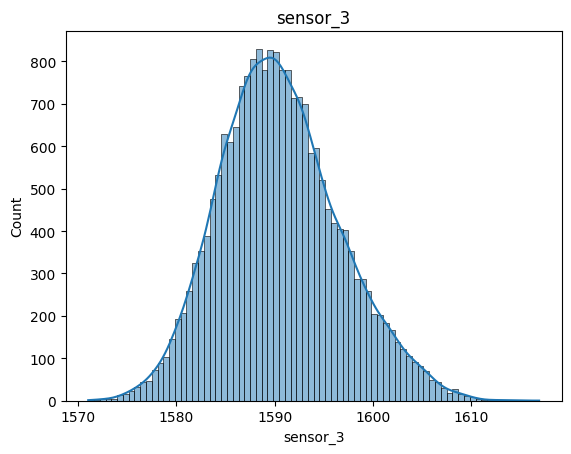

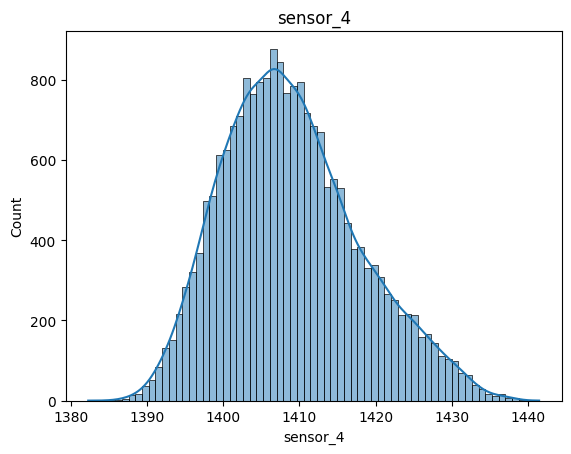

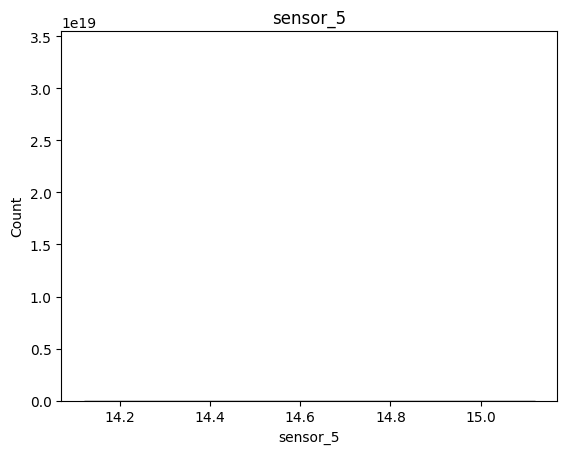

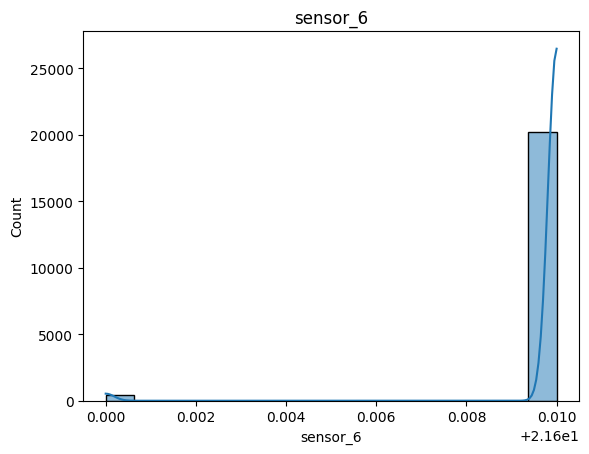

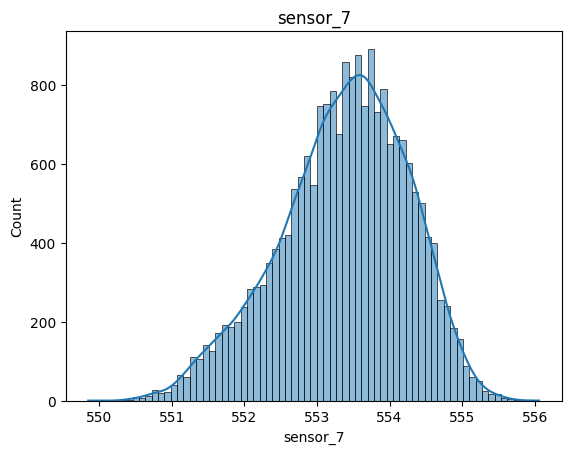

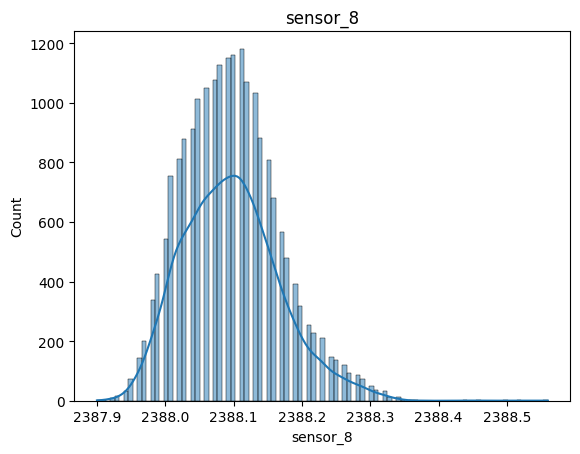

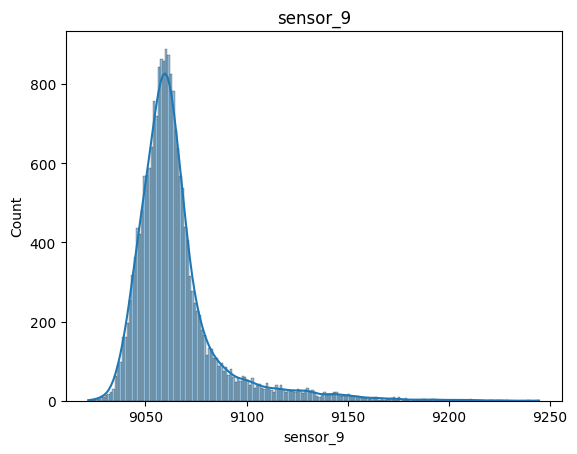

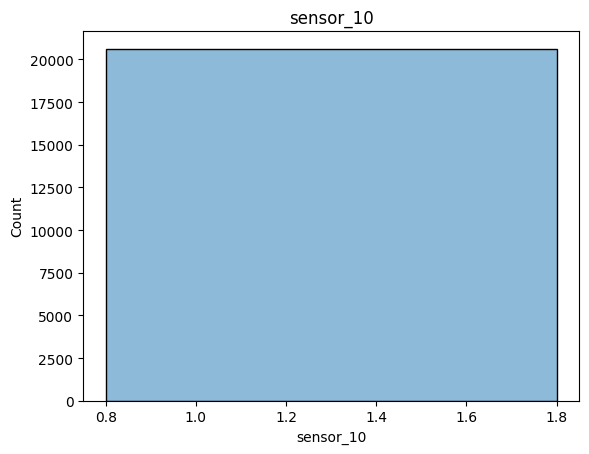

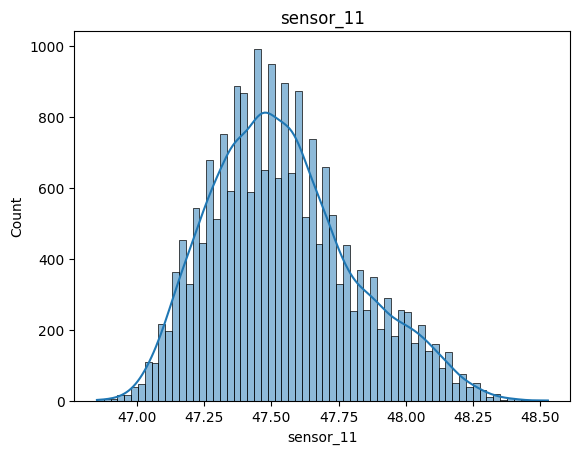

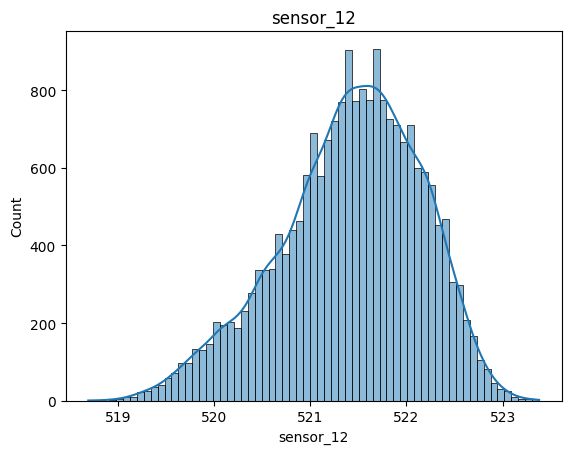

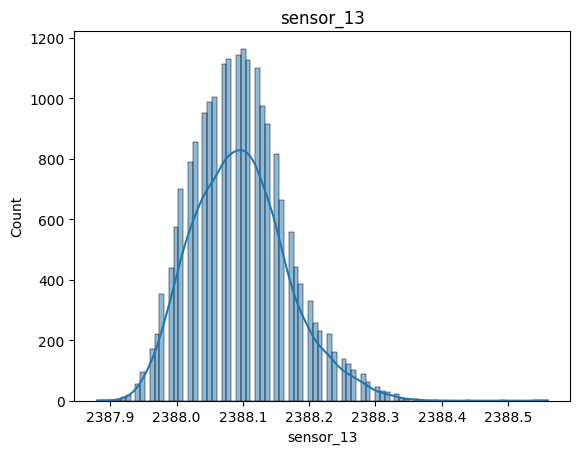

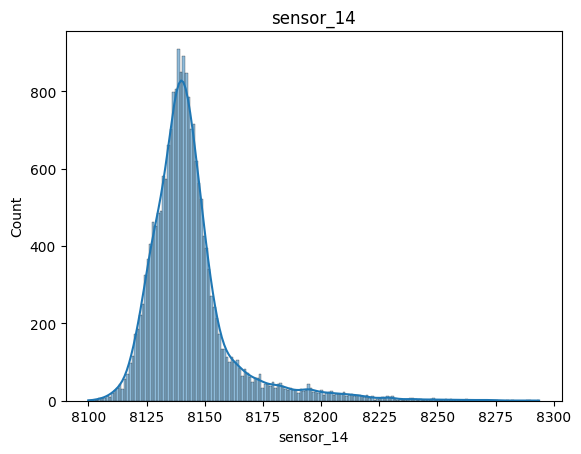

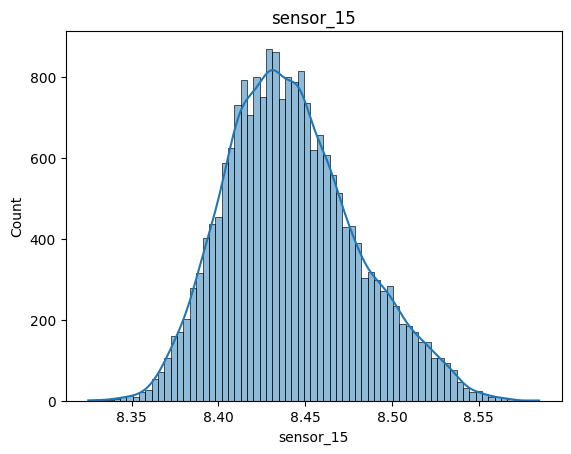

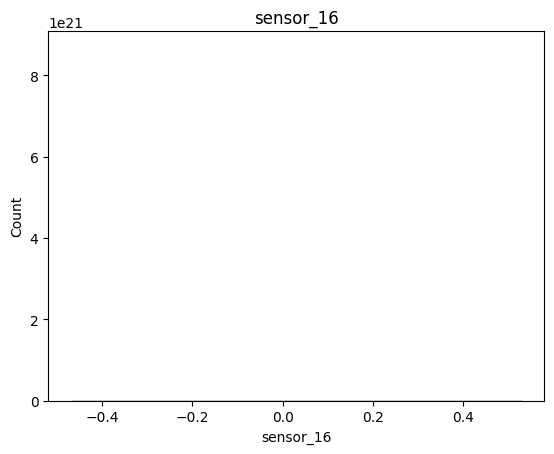

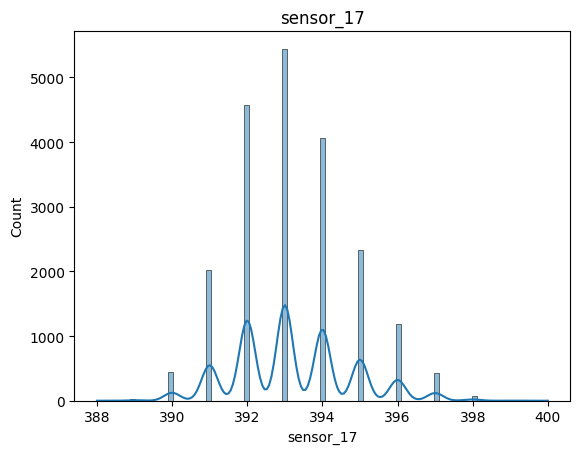

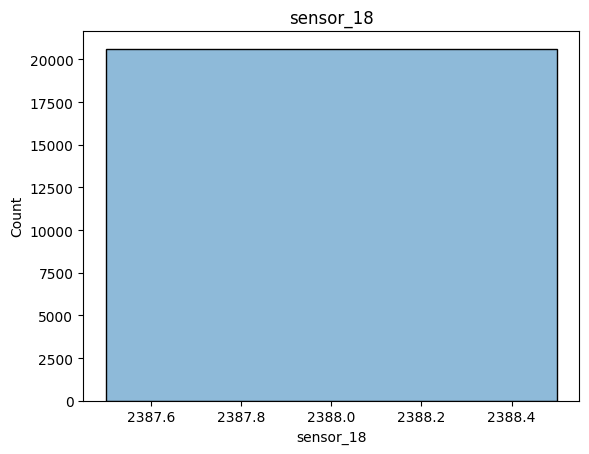

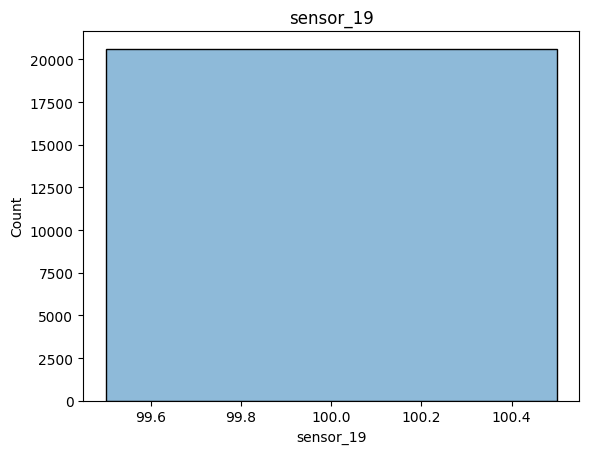

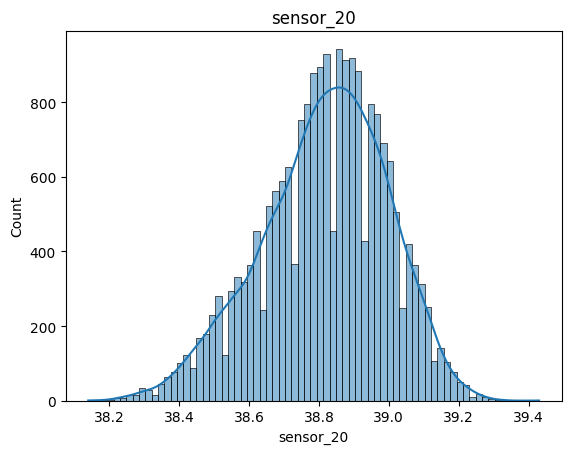

In [10]:
import matplotlib.pyplot as plt

for i in sensor_names:
    plt.figure

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.stats import entropy as scipy_entropy

def calculate_absolute_mean(data):
    return np.mean(np.abs(data))

def calculate_standard_deviation(data):
    return np.std(data)

def calculate_skewness(data):
    return skew(data)

def calculate_kurtosis(data):
    return kurtosis(data)

def calculate_entropy(data):
    p_data = np.histogram(data, bins=10, density=True)[0]
    p_data = p_data[p_data > 0]  # Filter non-zero probabilities
    return scipy_entropy(p_data)

def create_time_domain_features(data):
    features = []

    for unit in data['unit_number'].unique():
        unit_data = data[data['unit_number'] == unit]

        feature_dict = {
            'unit_number': unit,
            'time_in_cycles': unit_data['time_in_cycles'].iloc[-1]  # Last cycle number
        }

        for col in unit_data.columns[2:]:
            unit_col_data = unit_data[col].values

            feature_dict[f'{col}_absolute_mean'] = calculate_absolute_mean(unit_col_data)
            feature_dict[f'{col}_std_dev'] = calculate_standard_deviation(unit_col_data)
            feature_dict[f'{col}_skewness'] = calculate_skewness(unit_col_data)
            feature_dict[f'{col}_kurtosis'] = calculate_kurtosis(unit_col_data)
            feature_dict[f'{col}_entropy'] = calculate_entropy(unit_col_data)

        features.append(feature_dict)
    
    return pd.DataFrame(features)


In [20]:
# Load data
train_data = pd.read_csv(
    '../data/raw/train_FD001.txt',
      sep='\s+', 
      header=None, 
      index_col=False, 
      names=column_names,
      )

columns = ['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 21)]
train_data.columns = columns

# Apply feature extraction
time_domain_features = create_time_domain_features(train_data)


/var/folders/49/pdpmsz1x33g_s0glp3s0b0wh0000gn/T/ipykernel_1487/2409688498.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_data = pd.read_csv(
/var/folders/49/pdpmsz1x33g_s0glp3s0b0wh0000gn/T/ipykernel_1487/747087208.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return skew(data)
/var/folders/49/pdpmsz1x33g_s0glp3s0b0wh0000gn/T/ipykernel_1487/747087208.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return kurtosis(data)


In [21]:
time_domain_features.head()

,unit_number,time_in_cycles,op_setting_1_absolute_mean,op_setting_1_std_dev,op_setting_1_skewness,op_setting_1_kurtosis,op_setting_1_entropy,op_setting_2_absolute_mean,op_setting_2_std_dev,op_setting_2_skewness,...,sensor_measurement_19_absolute_mean,sensor_measurement_19_std_dev,sensor_measurement_19_skewness,sensor_measurement_19_kurtosis,sensor_measurement_19_entropy,sensor_measurement_20_absolute_mean,sensor_measurement_20_std_dev,sensor_measurement_20_skewness,sensor_measurement_20_kurtosis,sensor_measurement_20_entropy
0,1,192,0.001562,0.001948,-0.210476,-0.063218,1.929960,0.000244,0.000282,-0.048637,...,100.0,0.0,NaN,NaN,0.0,38.840052,0.166563,-0.637596,-0.064292,2.026837
1,2,287,0.001787,0.002316,0.083455,0.302384,1.875736,0.000267,0.000297,-0.076706,...,100.0,0.0,NaN,NaN,0.0,38.901150,0.198985,-0.878576,0.425516,1.992704
2,3,179,0.001651,0.002139,0.091031,0.406663,1.945591,0.000246,0.000289,-0.005271,...,100.0,0.0,NaN,NaN,0.0,38.882793,0.165648,-0.654872,0.379710,2.000848
3,4,189,0.001602,0.002028,0.123352,-0.207016,2.017733,0.000247,0.000285,0.044403,...,100.0,0.0,NaN,NaN,0.0,38.830265,0.158880,-0.659830,0.713857,1.914256
4,5,269,0.001694,0.002115,-0.190547,-0.057245,1.987798,0.000241,0.000278,0.191964,...,100.0,0.0,NaN,NaN,0.0,38.891078,0.186784,-0.736531,0.229206,2.032747


In [25]:
time_domain_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 117 entries, unit_number to sensor_measurement_20_entropy
dtypes: float64(115), int64(2)
memory usage: 91.5 KB


In [26]:
# Add RUL to the time domain features based of max cycle number
time_domain_features["RUL"] = 0
for unit in time_domain_features["unit_number"].unique():
    max_cycles = time_domain_features[time_domain_features["unit_number"] == unit]["time_in_cycles"].max()
    time_domain_features.loc[time_domain_features["unit_number"] == unit, "RUL"] = max_cycles - time_domain_features[time_domain_features["unit_number"] == unit]["time_in_cycles"]

time_domain_features.head()

,unit_number,time_in_cycles,op_setting_1_absolute_mean,op_setting_1_std_dev,op_setting_1_skewness,op_setting_1_kurtosis,op_setting_1_entropy,op_setting_2_absolute_mean,op_setting_2_std_dev,op_setting_2_skewness,...,sensor_measurement_19_std_dev,sensor_measurement_19_skewness,sensor_measurement_19_kurtosis,sensor_measurement_19_entropy,sensor_measurement_20_absolute_mean,sensor_measurement_20_std_dev,sensor_measurement_20_skewness,sensor_measurement_20_kurtosis,sensor_measurement_20_entropy,RUL
0,1,192,0.001562,0.001948,-0.210476,-0.063218,1.929960,0.000244,0.000282,-0.048637,...,0.0,NaN,NaN,0.0,38.840052,0.166563,-0.637596,-0.064292,2.026837,0
1,2,287,0.001787,0.002316,0.083455,0.302384,1.875736,0.000267,0.000297,-0.076706,...,0.0,NaN,NaN,0.0,38.901150,0.198985,-0.878576,0.425516,1.992704,0
2,3,179,0.001651,0.002139,0.091031,0.406663,1.945591,0.000246,0.000289,-0.005271,...,0.0,NaN,NaN,0.0,38.882793,0.165648,-0.654872,0.379710,2.000848,0
3,4,189,0.001602,0.002028,0.123352,-0.207016,2.017733,0.000247,0.000285,0.044403,...,0.0,NaN,NaN,0.0,38.830265,0.158880,-0.659830,0.713857,1.914256,0
4,5,269,0.001694,0.002115,-0.190547,-0.057245,1.987798,0.000241,0.000278,0.191964,...,0.0,NaN,NaN,0.0,38.891078,0.186784,-0.736531,0.229206,2.032747,0


In [57]:
# Add RUL to train_df
train_df['RUL'] = 0
for i in train_df['id'].unique():
    max_time = train_df[train_df['id'] == i]['time'].max()
    train_df.loc[train_df['id'] == i, 'RUL'] = max_time - train_df.loc[train_df['id'] == i, 'time']

train_df.head()

,id,time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,cluster,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,1,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,4,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,5,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,2,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,3,187


<Axes: xlabel='time', ylabel='RUL'>

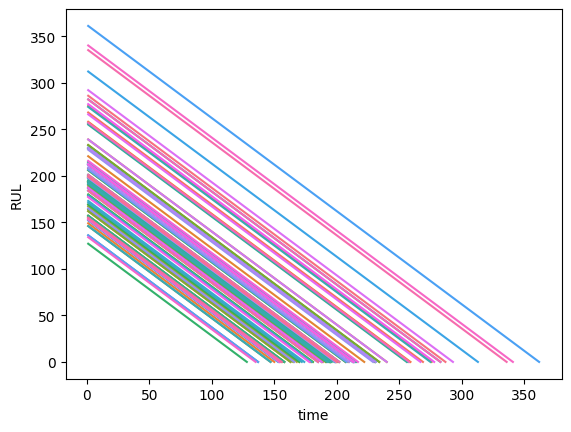

In [58]:
# visualize RUL
sns.lineplot(data=train_df, x='time', y='RUL', hue='id', legend=False)

In [61]:
from sklearn.preprocessing import MinMaxScaler

def normalize_sensor_data(data, sensor_columns):
    scaler = MinMaxScaler()
    data[sensor_columns] = scaler.fit_transform(data[sensor_columns])
    return data

# Sensor columns
sensor_columns = [f'sensor_{i}' for i in range(1, 21)]

# Normalize the training data
train_data_normalized = normalize_sensor_data(train_df, sensor_columns)


In [64]:
def compute_health_indicator(data, sensor_columns):
    # Initialize the HI column
    data['HI'] = 0.0
    
    for unit in data['id'].unique():
        unit_data = data[data['id'] == unit]
        max_cycles = unit_data['time'].max()
        
        for idx in unit_data.index:
            cycle = data.loc[idx, 'time']
            # Linear degradation from 1 to 0
            hi = 1 - (cycle / max_cycles)
            data.at[idx, 'HI'] = hi

    return data

# Compute the HI for the training data
train_data_normalized = compute_health_indicator(train_data_normalized, sensor_columns)


<Axes: xlabel='time', ylabel='HI'>

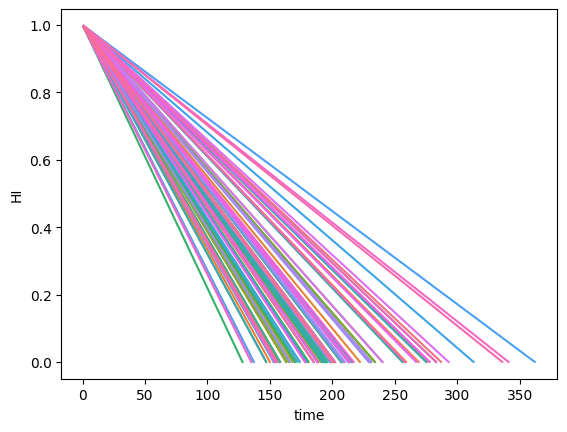

In [65]:
# Visualize the HI
sns.lineplot(data=train_data_normalized, x='time', y='HI', hue='id', legend=False)

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Define most trended sensors
sensor_trended = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 
                  'sensor_11', 'sensor_12', 'sensor_15', 'sensor_17']

# Prepare the data for regression
X = train_data_normalized[sensor_trended]
y = train_data_normalized['HI']

# Fit the linear regression model
reg_model = LinearRegression().fit(X, y)

# Get bias and weights
bias = reg_model.intercept_
weights = reg_model.coef_

print(f'Bias: {bias}')
print(f'Weights: {weights}')


Bias: 0.9834579994179331
Weights: [-0.14096817 -0.21867324 -0.30604419  0.13117307 -0.32856986  0.13937417
 -0.22116004 -0.26019875]


In [67]:
def degradation_sensor_fusion(data, sensor_trended, weights, bias):
    sensor_values = data[sensor_trended].values
    health_indicator = np.dot(sensor_values, weights) + bias
    data['fused_health_indicator'] = health_indicator
    return data

# Apply the degradation sensor fusion
train_data_normalized = degradation_sensor_fusion(train_data_normalized, sensor_trended, weights, bias)


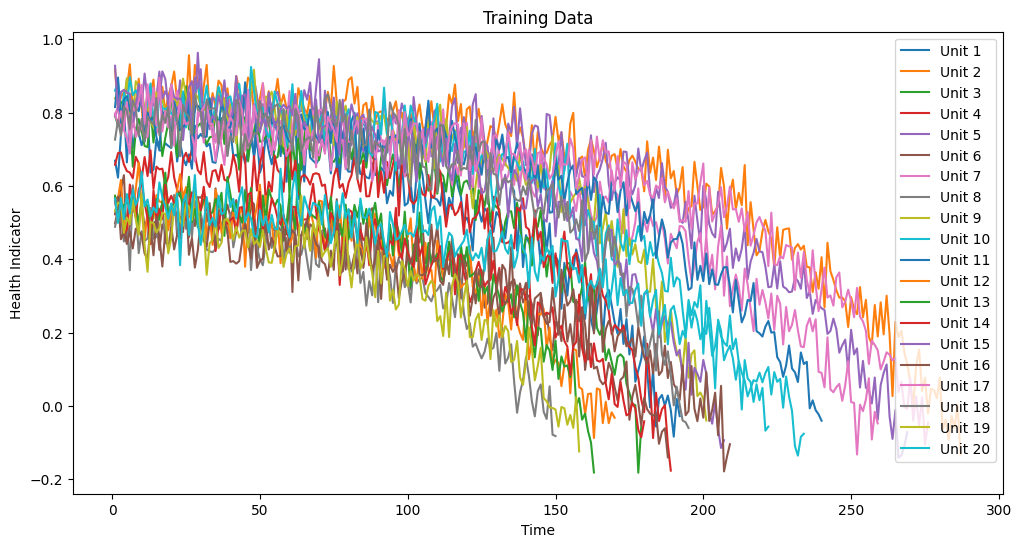

In [71]:
import matplotlib.pyplot as plt

def helper_plot_ensemble(data, unit_numbers, nsample=10):
    if unit_numbers is None:
        unit_numbers = data['id'].unique()[:nsample]
        
    plt.figure(figsize=(12, 6))
    for unit in unit_numbers:
        unit_data = data[data['id'] == unit]
        plt.plot(unit_data['time'], unit_data['fused_health_indicator'], label=f'Unit {unit}')
    
    plt.xlabel('Time')
    plt.ylabel('Health Indicator')
    plt.title('Training Data')
    plt.legend()
    plt.show()

# Visualize
helper_plot_ensemble(train_data_normalized, None, 20)


In [ ]:
# Build similarity model
from sklearn.metrics.pairwise import cosine_similarity

